<a href="https://colab.research.google.com/github/TanviMadyalkar/UNP-Project/blob/main/Group_1(Project_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Risk Prediction

Description : The dataset contains 21 attributes. Checking the other attributes, you have to predict credit risk of customers.

Objective : Predict credit risk of customers.

Link to the dataset : https://archive.ics.uci.edu/dataset/573/south+german+credit+update

In [ ]:
# Importing Python libraries for the project

import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression #for classification
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from matplotlib.pyplot import figure
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

**Uploading the dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving german_credit.csv to german_credit (1).csv


**Reading CSV file**

In [ ]:
# Saving the file as a Pandas DataFrame with variable df
df = pd.read_csv('/content/german_credit.csv')
df.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,03-Feb,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,03-Feb,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,03-Feb,unskilled - resident,0 to 2,no,yes,good


In [ ]:
# Dropping columns that are not required

df = df.drop(columns = ['personal_status_sex','other_debtors','present_residence',
                   'other_installment_plans','housing','number_credits',
                   'people_liable','telephone','foreign_worker'])

In [ ]:
# Finding unique values

ab = pd.DataFrame(df, columns=['status','credit_history','savings','employment_duration','installment_rate','property','job'])

a = pd.unique(df['status'].values.ravel())
b = pd.unique(df['credit_history'].values.ravel())
c = pd.unique(df['savings'].values.ravel())
d = pd.unique(df['employment_duration'].values.ravel())
e = pd.unique(df['installment_rate'].values.ravel())
f = pd.unique(df['property'].values.ravel())
g = pd.unique(df['job'].values.ravel())
h = pd.unique(df['purpose'].values.ravel())
print('status: \n',a,'\n','credit_history: \n',b,'\n savings: \n',c,
    '\n employment_duration: \n',d,'\n installment_rate: \n',e,
    '\n property: \n',f,'\n job: \n',g,'\n purpose: \n',h)

status: 
 ['no checking account' '... < 0 DM'
 '... >= 200 DM / salary for at least 1 year' '0<= ... < 200 DM'] 
 credit_history: 
 ['all credits at this bank paid back duly'
 'no credits taken/all credits paid back duly'
 'existing credits paid back duly till now'
 'delay in paying off in the past'
 'critical account/other credits elsewhere'] 
 savings: 
 ['unknown/no savings account' '... <  100 DM' '100 <= ... <  500 DM'
 '... >= 1000 DM' '500 <= ... < 1000 DM'] 
 employment_duration: 
 ['< 1 yr' '1 <= ... < 4 yrs' '4 <= ... < 7 yrs' 'unemployed' '>= 7 yrs'] 
 installment_rate: 
 ['< 20' '25 <= ... < 35' '20 <= ... < 25' '>= 35'] 
 property: 
 ['car or other' 'unknown / no property'
 'building soc. savings agr./life insurance' 'real estate'] 
 job: 
 ['skilled employee/official' 'unskilled - resident'
 'unemployed/unskilled - non-resident'
 'manager/self-empl./highly qualif. employee'] 
 purpose: 
 ['car (used)' 'others' 'retraining' 'furniture/equipment' 'car (new)'
 'business' 'do

In [ ]:
df['savings'] = df['savings'].replace({'unknown/no savings account': '0', '... <  100 DM': '<100', '100 <= ... <  500 DM': '100-500',
                                       '... >= 1000 DM':'>1000 DM', '500 <= ... < 1000 DM':'500-1000'})
df['status'] = df['status'].replace({'no checking account': 'No Check','... < 0 DM': '<0 DM', '... >= 200 DM / salary for at least 1 year':'>200 DM',
                     '0<= ... < 200 DM': '<200 DM'})
df['credit_history'] = df['credit_history'].replace({'all credits at this bank paid back duly':'paid back','no credits taken/all credits paid back duly':'paid back',
                              'existing credits paid back duly till now':'paid back','delay in paying off in the past':'not paid back',
                              'critical account/other credits elsewhere':'other credits'})
df['employment_duration'] = df['employment_duration'].replace({'unemployed':'0','1 <= ... < 4 yrs':'1-4 yrs','4 <= ... < 7 yrs':'4-7 yrs','>= 7 yrs':'>7 yrs'})
df['installment_rate'] = df['installment_rate'].replace({'25 <= ... < 35':'25-35','20 <= ... < 25':'20-25','>= 35':'>35'})
df['property'] = df['property'].replace({'car or other': 'Vehicle', 'unknown / no property':'Nothing',
 'building soc. savings agr./life insurance':'Insurance' ,'real estate': 'Estate'})
df['job'] = df['job'].replace({'skilled employee/official': 'skilled','unskilled - resident': 'unskilled',
                   'unemployed/unskilled - non-resident':'unskilled', 'manager/self-empl./highly qualif. employee':'skilled'})
df['purpose'] = df['purpose'].replace({'car (used)':'car','car (new)':'car','furniture/equipment':'equipment','radio/television':'broadcast'})

In [ ]:
df.head(10)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,property,age,job,credit_risk
0,No Check,18,paid back,car,1049,0,< 1 yr,< 20,Vehicle,21,skilled,good
1,No Check,9,paid back,others,2799,0,1-4 yrs,25-35,Nothing,36,skilled,good
2,<0 DM,12,paid back,retraining,841,<100,4-7 yrs,25-35,Nothing,23,unskilled,good
3,No Check,12,paid back,others,2122,0,1-4 yrs,20-25,Nothing,39,unskilled,good
4,No Check,12,paid back,others,2171,0,1-4 yrs,< 20,Vehicle,38,unskilled,good
5,No Check,10,paid back,others,2241,0,< 1 yr,>35,Nothing,48,unskilled,good
6,No Check,8,paid back,others,3398,0,4-7 yrs,>35,Nothing,39,unskilled,good
7,No Check,6,paid back,others,1361,0,< 1 yr,25-35,Nothing,40,unskilled,good
8,>200 DM,18,paid back,equipment,1098,0,0,< 20,Insurance,65,unskilled,good
9,<0 DM,24,paid back,equipment,3758,100-500,0,>35,Estate,23,unskilled,good


# Step 1 : Data Preprocessing

In [ ]:
# For getting the shape of the DataFrame
df.shape

(1000, 12)

In [ ]:
# Display information about the DataFrame(for NaN values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   status               1000 non-null   object
 1   duration             1000 non-null   int64 
 2   credit_history       1000 non-null   object
 3   purpose              1000 non-null   object
 4   amount               1000 non-null   int64 
 5   savings              1000 non-null   object
 6   employment_duration  1000 non-null   object
 7   installment_rate     1000 non-null   object
 8   property             1000 non-null   object
 9   age                  1000 non-null   int64 
 10  job                  1000 non-null   object
 11  credit_risk          1000 non-null   object
dtypes: int64(3), object(9)
memory usage: 93.9+ KB


In [ ]:
# Check for missing values in the DataFrame
df.isna().sum()

status                 0
duration               0
credit_history         0
purpose                0
amount                 0
savings                0
employment_duration    0
installment_rate       0
property               0
age                    0
job                    0
credit_risk            0
dtype: int64

As we can see that our Data is clean(i.e, without any NaN value)
Soo we move to the next step...which is Exploratory Data Analysis (EDA)

# Step 2 : Exploratory Data Analysis (EDA)

In [ ]:
# For gaining some Statistical information about the data
df.describe()

,duration,amount,age
count,1000.000000,1000.00000,1000.00000
mean,20.903000,3271.24800,35.54200
std,12.058814,2822.75176,11.35267
min,4.000000,250.00000,19.00000
25%,12.000000,1365.50000,27.00000
50%,18.000000,2319.50000,33.00000
75%,24.000000,3972.25000,42.00000
max,72.000000,18424.00000,75.00000


<ipython-input-26-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

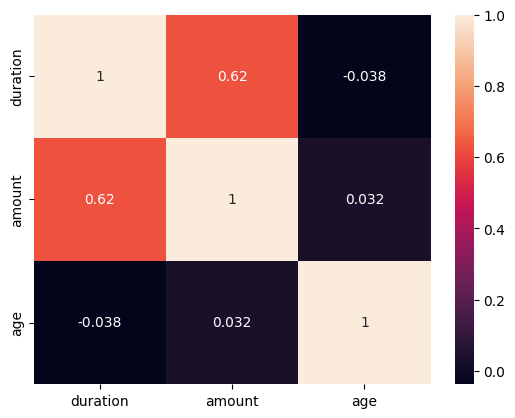

In [ ]:
sns.heatmap(df.corr(),annot=True)

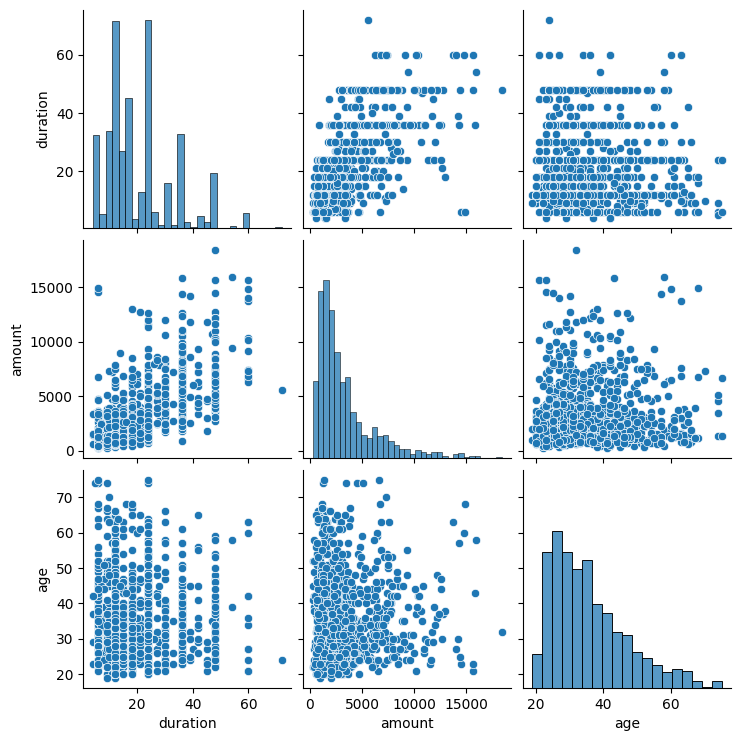

In [ ]:
sns.pairplot(df)

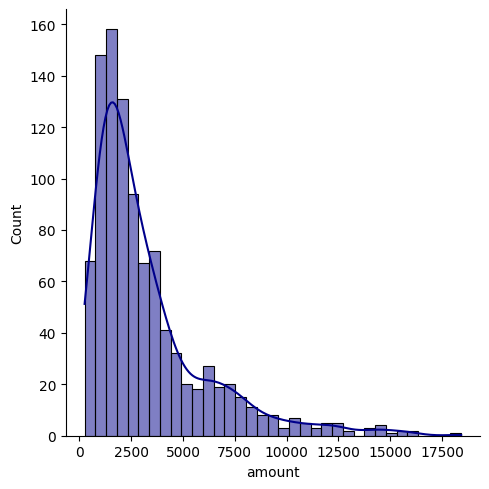

In [ ]:
sns.displot(data=df['amount'], kde=True, color='darkblue')

<Axes: xlabel='savings', ylabel='age'>

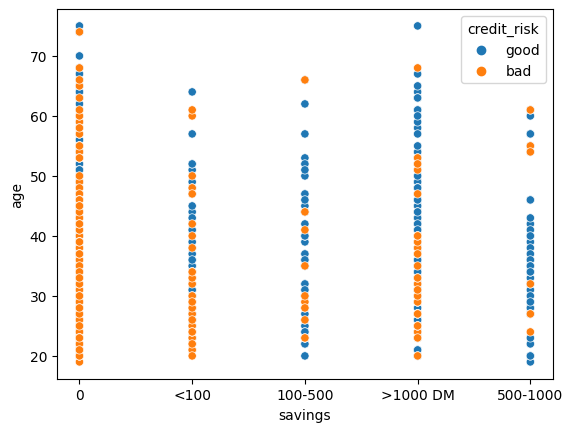

In [ ]:
sns.scatterplot(data=df,x='savings',y='age',hue='credit_risk')

<Axes: xlabel='savings', ylabel='amount'>

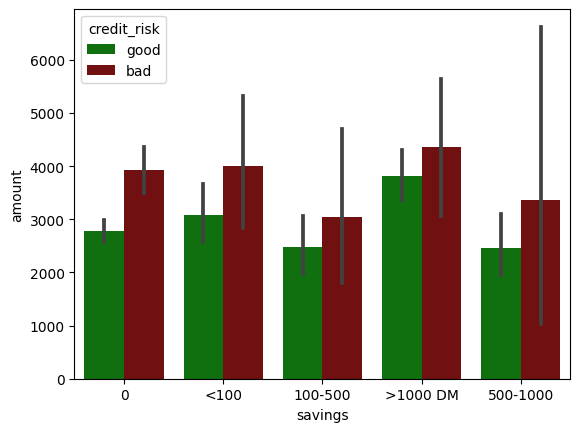

In [ ]:
sns.barplot(data=df, x="savings", y="amount", hue="credit_risk", palette=['green','maroon'])

<Axes: xlabel='age', ylabel='credit_risk'>

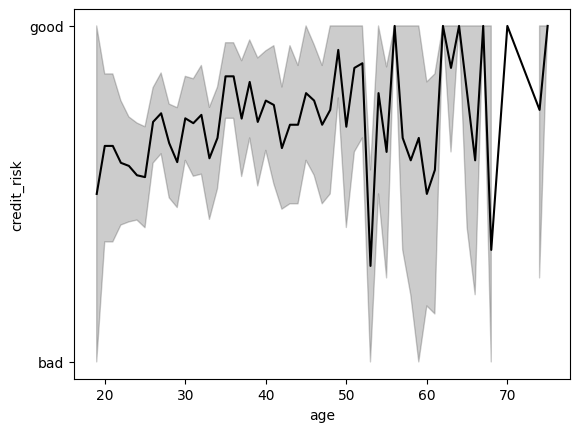

In [ ]:
sns.lineplot(data=df, x="age", y="credit_risk", color='black')

<Axes: xlabel='duration', ylabel='credit_risk'>

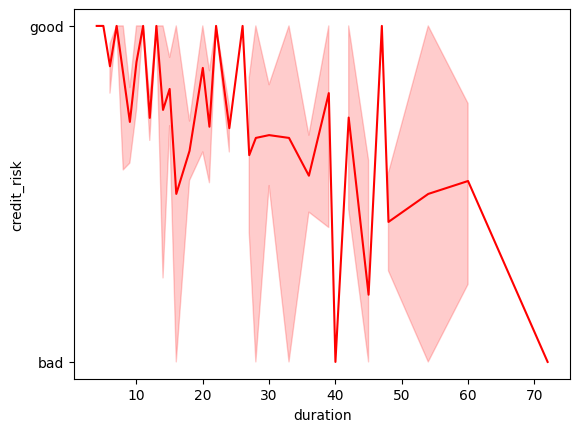

In [ ]:
sns.lineplot(data=df, x="duration", y="credit_risk", color='red')

<Axes: xlabel='credit_risk', ylabel='age'>

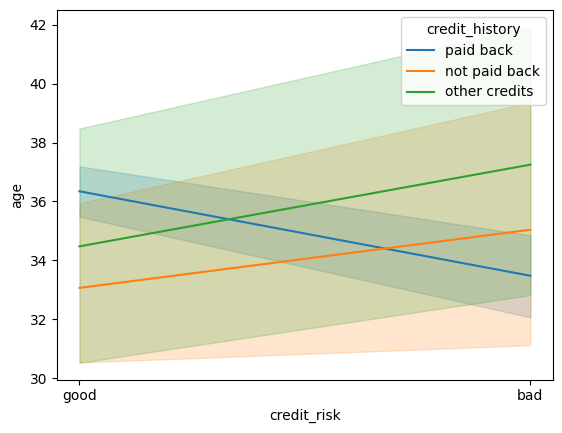

In [ ]:
sns.lineplot(data=df, x="credit_risk", y="age", hue="credit_history")

<Axes: xlabel='property', ylabel='duration'>

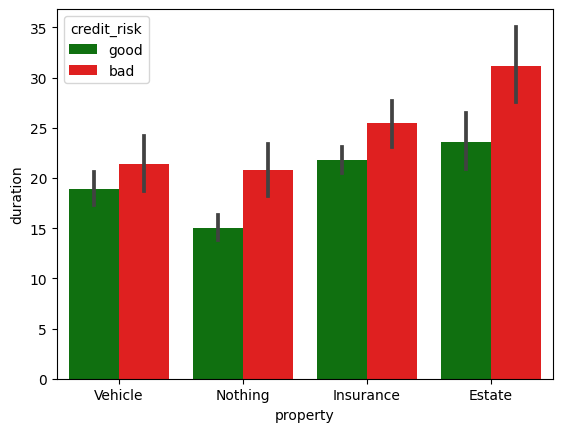

In [ ]:
sns.barplot(data=df, x="property", y="duration", hue="credit_risk", palette=['g','r'])

<Axes: xlabel='job', ylabel='amount'>

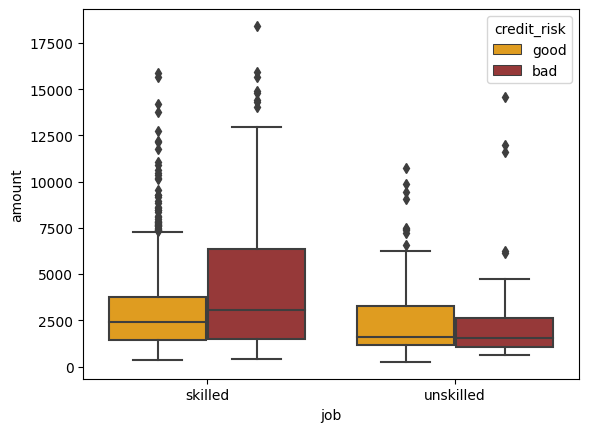

In [ ]:
sns.boxplot(x='job',y='amount', hue='credit_risk', palette=['orange','brown'], data=df)

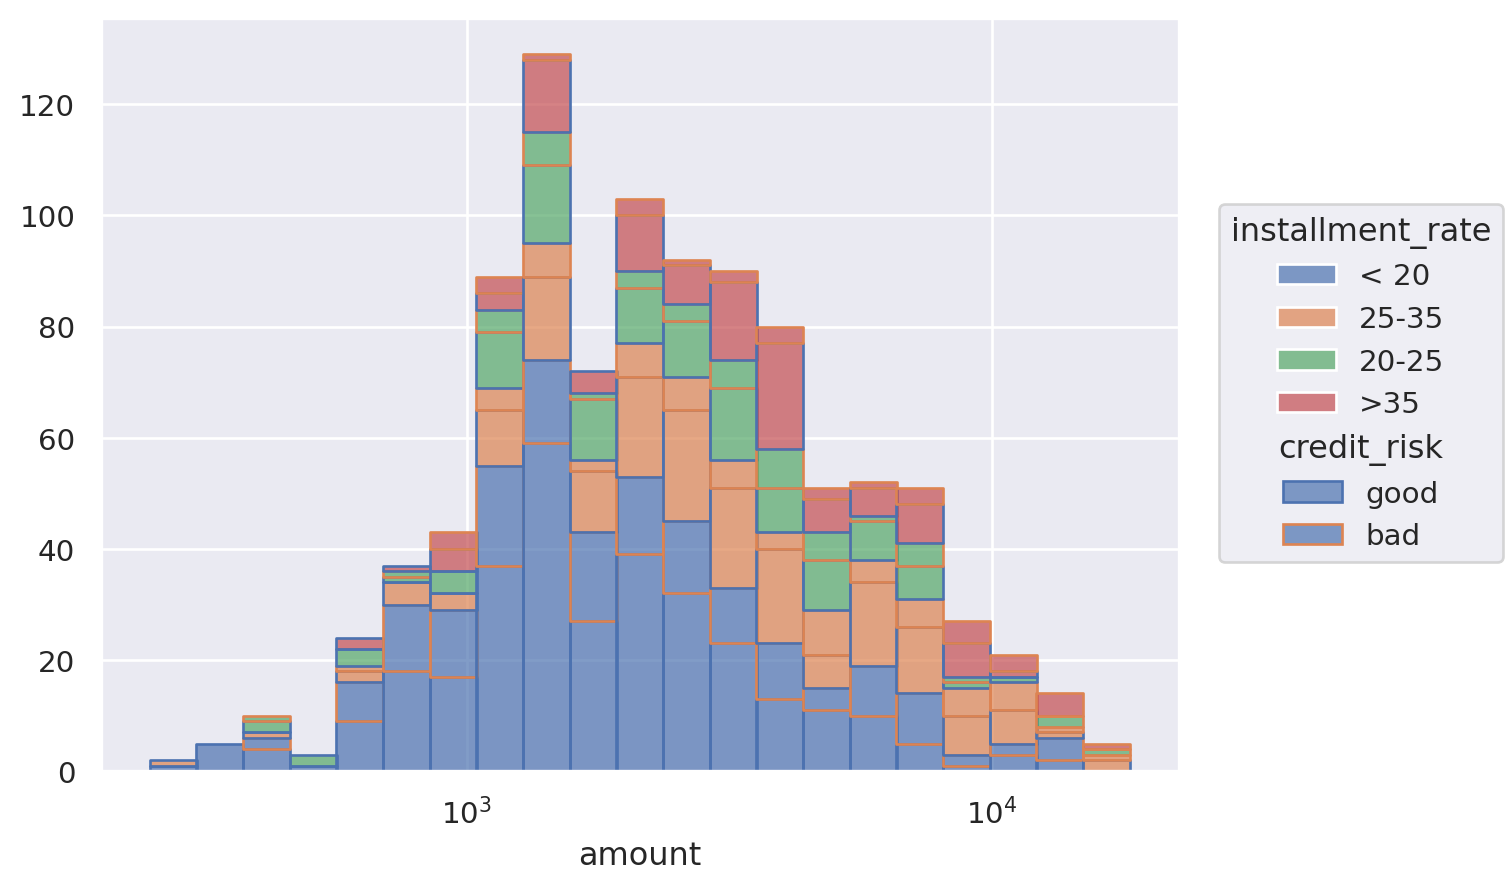

In [ ]:
import seaborn.objects as so
p = so.Plot(df,'amount').scale(x='log')
p.add(so.Bars(), so.Hist(),so.Stack(),color='installment_rate',edgecolor='credit_risk')

In [ ]:
# Assigning dummies

df['status'] = df.status.replace(('No Check','<0 DM','>200 DM', '<200 DM'),(0,1,1,1))
df['credit_history'] = df.credit_history.replace(('paid back','paid back','paid back', 'not paid back', 'other credits','not paid back'),(1,1,1,0,0,0))

df['savings'] = df.savings.replace(('0' ,'<100','100-500', '>1000 DM','500-1000'),(0,1,1,1,1))
df['employment_duration'] = df.employment_duration.replace(('< 1 yr' ,'1-4 yrs' ,'4-7 yrs' ,'0' ,'>7 yrs'),(1,1,1,0,1))

df['installment_rate'] = df.installment_rate.replace(('< 20','25-35' ,'20-25' ,'>35'),(0,1,0,1))

df['property'] = df.property.replace(('Vehicle','Nothing','Insurance','Estate'),(1,0,1,1))
df['job'] = df.job.replace(('skilled' ,'unskilled', 'unskilled', 'skilled'),(1,0,0,1))
df['purpose'] = df.purpose.replace(('others','retraining','equipment','car','business','domestic appliances','broadcast','repairs','vacation'),(1,1,0,0,1,0,0,0,1))

In [ ]:
X = pd.DataFrame(df, columns=['status','purpose','credit_history','savings','employment_duration','installment_rate','property','job'])
X

,status,purpose,credit_history,savings,employment_duration,installment_rate,property,job
0,0,0,1,0,1,0,1,1
1,0,1,1,0,1,1,0,1
2,1,1,1,1,1,1,0,0
3,0,1,1,0,1,0,0,0
4,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...
995,0,0,1,0,1,1,0,0
996,0,1,1,0,1,0,0,1
997,1,1,1,1,1,0,1,1
998,1,0,1,1,0,1,1,1


In [ ]:
y = pd.DataFrame(df,columns = ['credit_risk'])
y = df.credit_risk.replace(('good','bad'),(1,0))
y

0      1
1      1
2      1
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: credit_risk, Length: 1000, dtype: int64

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(700, 8)
(300, 8)
(700,)
(300,)


Logistic Regression


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 50)
from sklearn.linear_model import LogisticRegression
lgst = LogisticRegression(C=1e9)
lgst_model = lgst.fit(X_train,y_train)
lgst_pred = lgst.predict(X_test)
lgst_acc = accuracy_score(y_test,lgst_pred)
print("Accuracy of Logistic Regression: {:.2f}%".format(lgst_acc*100))

Accuracy of Logistic Regression: 72.50%


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state = 50)
from sklearn.linear_model import LogisticRegression
lgst = LogisticRegression(C=1e9)
lgst_model = lgst.fit(X_train,y_train)
lgst_pred = lgst.predict(X_test)
lgst_acc = accuracy_score(y_test,lgst_pred)
print("Accuracy of Logistic Regression: {:.2f}%".format(lgst_acc*100))

Accuracy of Logistic Regression: 74.00%


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 50)
from sklearn.linear_model import LogisticRegression
lgst = LogisticRegression(C=1e9)
lgst_model = lgst.fit(X_train,y_train)
lgst_pred = lgst.predict(X_test)
lgst_acc = accuracy_score(y_test,lgst_pred)
print("Accuracy of Logistic Regression: {:.2f}%".format(lgst_acc*100))

Accuracy of Logistic Regression: 74.33%


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35,random_state = 50)
from sklearn.linear_model import LogisticRegression
lgst = LogisticRegression(C=1e9)
lgst_model = lgst.fit(X_train,y_train)
lgst_pred = lgst.predict(X_test)
lgst_acc = accuracy_score(y_test,lgst_pred)
print("Accuracy of Logistic Regression: {:.2f}%".format(lgst_acc*100))

Accuracy of Logistic Regression: 74.57%


In [ ]:
def get_test_result(model):
    test_pred = model.predict(X_test)
    return(classification_report(y_test,test_pred))

test_result=get_test_result(lgst_model)
print(test_result)

              precision    recall  f1-score   support

           0       0.59      0.27      0.37        84
           1       0.77      0.93      0.84       216

    accuracy                           0.74       300
   macro avg       0.68      0.60      0.61       300
weighted avg       0.72      0.74      0.71       300



Decision Tree Classification

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
from sklearn.tree import DecisionTreeClassifier
credit_model = DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=10)
credit_model.fit(X_train,y_train)
pred=credit_model.predict(X_test)
credit_acc = accuracy_score(y_test,pred)
print(pred)
print("Accuracy of Decision Tree Classification: {:.2f}%".format(credit_acc*100))

[1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 0
 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1]
Accuracy of Decision Tree Regression: 73.00%


In [ ]:
def get_test_result(model):
    test_pred = model.predict(X_test)
    return(classification_report(y_test,test_pred))

test_result=get_test_result(lgst_model)
print(test_result)

              precision    recall  f1-score   support

           0       0.70      0.34      0.46        68
           1       0.73      0.92      0.82       132

    accuracy                           0.73       200
   macro avg       0.71      0.63      0.64       200
weighted avg       0.72      0.72      0.69       200



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=0)
from sklearn.tree import DecisionTreeClassifier
credit_model = DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=10)
credit_model.fit(X_train,y_train)
pred=credit_model.predict(X_test)
credit_acc = accuracy_score(y_test,pred)
print(pred)
print("Accuracy of Decision Tree Classification: {:.2f}%".format(credit_acc*100))

[1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 0
 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1]
Accuracy of Decision Tree Classification: 72.00%


In [ ]:
def get_test_result(model):
    test_pred = model.predict(X_test)
    return(classification_report(y_test,test_pred))

test_result=get_test_result(lgst_model)
print(test_result)

              precision    recall  f1-score   support

           0       0.68      0.34      0.45        83
           1       0.74      0.92      0.82       167

    accuracy                           0.73       250
   macro avg       0.71      0.63      0.64       250
weighted avg       0.72      0.73      0.70       250



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)
from sklearn.tree import DecisionTreeClassifier
credit_model = DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=10)
credit_model.fit(X_train,y_train)
pred=credit_model.predict(X_test)
credit_acc = accuracy_score(y_test,pred)
print(pred)
print("Accuracy of Decision Tree Classification: {:.2f}%".format(credit_acc*100))

[1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0
 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1
 1 0 1 1]
Accuracy of Decision Tree Classification: 70.33%


In [ ]:
def get_test_result(model):
    test_pred = model.predict(X_test)
    return(classification_report(y_test,test_pred))

test_result=get_test_result(lgst_model)
print(test_result)

              precision    recall  f1-score   support

           0       0.68      0.32      0.44       100
           1       0.73      0.93      0.82       200

    accuracy                           0.72       300
   macro avg       0.71      0.62      0.63       300
weighted avg       0.71      0.72      0.69       300



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35,random_state=0)
from sklearn.tree import DecisionTreeClassifier
credit_model = DecisionTreeClassifier(random_state=1,criterion='entropy',max_depth=10)
credit_model.fit(X_train,y_train)
pred=credit_model.predict(X_test)
credit_acc = accuracy_score(y_test,pred)
print(pred)
print("Accuracy of Decision Tree Classification: {:.2f}%".format(credit_acc*100))

[0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1
 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1
 1 0 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0
 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0
 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1
 1 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0]
Accuracy of Decision Tree Classification: 70.00%


In [ ]:
def get_test_result(model):
    test_pred = model.predict(X_test)
    return(classification_report(y_test,test_pred))

test_result=get_test_result(lgst_model)
print(test_result)

              precision    recall  f1-score   support

           0       0.68      0.32      0.43       113
           1       0.74      0.93      0.82       237

    accuracy                           0.73       350
   macro avg       0.71      0.62      0.63       350
weighted avg       0.72      0.73      0.70       350



Random Forest Classifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(random_state=1)
forest_model.fit(X_train,y_train)
preds=forest_model.predict(X_test)
forest_acc = accuracy_score(y_test,preds)
print(preds)
print("Accuracy of Random Forest Classification: {:.2f}%".format(forest_acc*100))

[1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1
 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 0
 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1]
Accuracy of Random Forest Classification: 75.50%


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=0)
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(random_state=1)
forest_model.fit(X_train,y_train)
preds=forest_model.predict(X_test)
forest_acc = accuracy_score(y_test,preds)
print(preds)
print("Accuracy of Random Forest Classification: {:.2f}%".format(forest_acc*100))

[1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1
 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0
 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1]
Accuracy of Random Forest Classification: 73.20%


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(random_state=1)
forest_model.fit(X_train,y_train)
preds=forest_model.predict(X_test)
forest_acc = accuracy_score(y_test,preds)
print(preds)
print("Accuracy of Random Forest Classification: {:.2f}%".format(forest_acc*100))

[1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1
 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0
 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1
 1 0 1 1]
Accuracy of Random Forest Classification: 71.33%


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35,random_state=0)
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(random_state=1)
forest_model.fit(X_train,y_train)
preds=forest_model.predict(X_test)
bank_acc = accuracy_score(y_test,preds)
forest_acc = accuracy_score(y_test,preds)
print(preds)
print("Accuracy of Random Forest Classification: {:.2f}%".format(forest_acc*100))

[1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1
 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0
 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0
 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0]
Accuracy of Random Forest Classification: 70.57%


Support Vector Classifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
from sklearn.svm import SVC
svc_model= SVC(kernel='rbf')
svc_model.fit(X_train,y_train)
preds=svc_model.predict(X_test)
svc_acc = accuracy_score(y_test,preds)
print(preds)
print("Accuracy of Support Vector Classification: {:.2f}%".format(svc_acc*100))

[1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy of Support Vector Classification: 72.00%


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=0)
from sklearn.svm import SVC
svc_model= SVC(kernel='rbf')
svc_model.fit(X_train,y_train)
preds=svc_model.predict(X_test)
svc_acc = accuracy_score(y_test,preds)
print(preds)
print("Accuracy of Support Vector Classification: {:.2f}%".format(svc_acc*100))

[1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1]
Accuracy of Support Vector Classification: 72.00%


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)
from sklearn.svm import SVC
svc_model= SVC(kernel='rbf')
svc_model.fit(X_train,y_train)
preds=svc_model.predict(X_test)
svc_acc = accuracy_score(y_test,preds)
print(preds)
print("Accuracy of Support Vector Classification: {:.2f}%".format(svc_acc*100))

[1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1
 1 1 1 1]
Accuracy of Support Vector Classification: 71.00%


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35,random_state=0)
from sklearn.svm import SVC
svc_model= SVC(kernel='rbf')
svc_model.fit(X_train,y_train)
preds=svc_model.predict(X_test)
svc_acc = accuracy_score(y_test,preds)
print(preds)
print("Accuracy of Support Vector Classification: {:.2f}%".format(svc_acc*100))

[1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1]
Accuracy of Support Vector Classification: 72.29%


K-Neighbours Classification

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
from sklearn.neighbors import KNeighborsClassifier
knn_model= KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train,y_train)
preds=knn_model.predict(X_test)
knn_acc = accuracy_score(y_test,preds)
print(preds)
print("Accuracy of K-Neighbours Classification: {:.2f}%".format(knn_acc*100))

[1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1
 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 0
 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1]
Accuracy of K-Neighbours Classification: 74.00%


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=0)
from sklearn.neighbors import KNeighborsClassifier
knn_model= KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train,y_train)
preds=knn_model.predict(X_test)
knn_acc = accuracy_score(y_test,preds)
print(preds)
print("Accuracy of K-Neighbours Classification: {:.2f}%".format(knn_acc*100))

[1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1
 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0
 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1]
Accuracy of K-Neighbours Classification: 72.80%


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)
from sklearn.neighbors import KNeighborsClassifier
knn_model= KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train,y_train)
preds=knn_model.predict(X_test)
knn_acc = accuracy_score(y_test,preds)
print(preds)
print("Accuracy of K-Neighbours Classification: {:.2f}%".format(knn_acc*100))

[1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1
 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0
 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1
 1 0 1 1]
Accuracy of K-Neighbours Classification: 70.67%


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35,random_state=0)
from sklearn.neighbors import KNeighborsClassifier
knn_model= KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train,y_train)
preds=knn_model.predict(X_test)
knn_acc = accuracy_score(y_test,preds)
print(preds)
print("Accuracy of K-Neighbours Classification: {:.2f}%".format(knn_acc*100))

[1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1
 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0
 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0]
Accuracy of K-Neighbours Classification: 70.57%


K-means Clustering

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
from sklearn.cluster import KMeans
kmeans_model= KMeans(n_clusters=2)
kmeans_model.fit(X_train,y_train)
preds=kmeans_model.predict(X_test)
kmeans_acc = accuracy_score(y_test,preds)
print(preds)
print("Accuracy of K-means Classification: {:.2f}%".format(kmeans_acc*100))

[0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1
 1 0 1 1 1 0 0 0 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1
 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1]
Accuracy of K-means Classification: 71.00%


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=0)
from sklearn.cluster import KMeans
kmeans_model= KMeans(n_clusters=2)
kmeans_model.fit(X_train,y_train)
preds=kmeans_model.predict(X_test)
kmeans_acc = accuracy_score(y_test,preds)
print(preds)
print("Accuracy of K-means Classification: {:.2f}%".format(kmeans_acc*100))

[0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1
 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1
 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 0
 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1
 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0
 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1]
Accuracy of K-means Classification: 62.80%


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)
from sklearn.cluster import KMeans
kmeans_model= KMeans(n_clusters=2)
kmeans_model.fit(X_train,y_train)
preds=kmeans_model.predict(X_test)
kmeans_acc = accuracy_score(y_test,preds)
print(preds)
print("Accuracy of K-means Classification: {:.2f}%".format(kmeans_acc*100))

[0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1
 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1
 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 0 0
 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1
 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0
 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0
 1 1 1 0]
Accuracy of K-means Classification: 62.67%


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35,random_state=0)
from sklearn.cluster import KMeans
kmeans_model= KMeans(n_clusters=2)
kmeans_model.fit(X_train,y_train)
preds=kmeans_model.predict(X_test)
kmeans_acc_acc = accuracy_score(y_test,preds)
print(preds)
print("Accuracy of K-means Classification: {:.2f}%".format(kmeans_acc*100))

[0 1 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1
 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 0 1
 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0
 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0
 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0
 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 1 1 1 0 1 0
 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0
 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0
 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 1]
Accuracy of K-means Classification: 62.67%


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
